In [ ]:
from importlib import reload

import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

import original

plt.rcParams["font.family"] = "serif"

reload(original)
system, system_no_sens = original.system, original.system_no_sens
system_true, system_sim = original.system_true, original.system_sim

# If True, use `system`, otherwise use `system_no_sens`.
# The former computes direct simulation sensitivity solutions while the latter
# does not.
# (In either case, when doing parameter updates we're using the asymptotic
# method, not the direct simulation method.)
include_sens = False

In [ ]:
I = 40
J = 5
size = I * (J + 1)

# Initial Conditions
rng = np.random.default_rng(42)
u0 = rng.uniform(size=size)
v0 = np.zeros(size)
w10 = np.zeros(size)
w20 = np.zeros(size)

γ = np.array([1e-2, 0.5])
c = γ
d = np.array([0.2, 0.5, 1, 2, 5])  # Dissipation coefficients for the v_{k,j}
F = 8  # Forcing constant

state0 = np.concatenate([u0, v0, w10, w20])  # Initial state

T = 200  # Time
dt = 10  # Length of each `solve_ivp` (used for )
tn = 100  # t-linspace for whole run is tn * N
t0 = 0  # Initial time
mu = 50  # Nudging parameter

# Number of iterations of `solve_ivp`
# (but no parameter updates between iterations since just testing nudging)
N = T // dt

ts, us, vs = [], [], []

for i in range(N):
    # Integrate the system
    if include_sens:
        soln = solve_ivp(
            system,
            (t0, t0 + dt),
            state0,
            args=(I, J, γ, c, F, d, mu),
            dense_output=True,
        )
    else:
        soln = solve_ivp(
            system_no_sens,
            (t0, t0 + dt),
            state0[: 2 * I * (J + 1)],
            args=(I, J, γ, c, F, d, mu),
            dense_output=True,
            rtol=1e-4,
        )

    # Interpolate in time
    t_array = np.linspace(t0, t0 + dt, tn)
    state = soln.sol(t_array)
    u_array = state[0:size, :]
    v_array = state[size : 2 * size, :]

    # Update time and initial conditions
    state0 = state[:, -1]
    t0 += dt

    # Append Lists
    us.append(u_array)
    vs.append(v_array)
    ts.append(t_array)

u = np.concatenate(us, axis=1)
v = np.concatenate(vs, axis=1)
tls = np.concatenate(ts)

err = np.linalg.norm(u - v, axis=0)
rel_err = err / np.linalg.norm(u, axis=0)

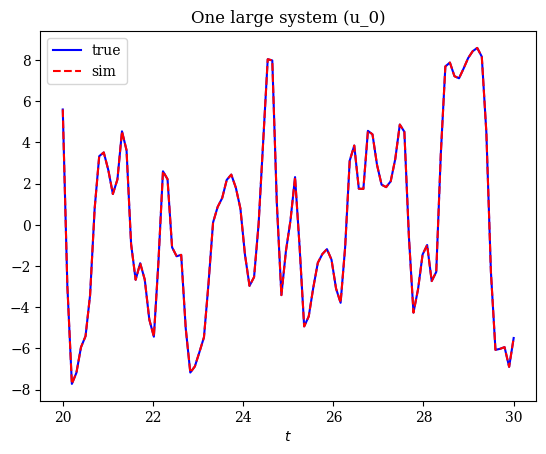

In [ ]:
s = np.s_[200:300]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], u[i, s], label="true", color="blue")
ax.plot(tls[s], v[i, s], label="sim", color="red", linestyle="--")

ax.set_title(f"One large system (u_{i})")
ax.set_xlabel("$t$")

ax.legend()
plt.show()

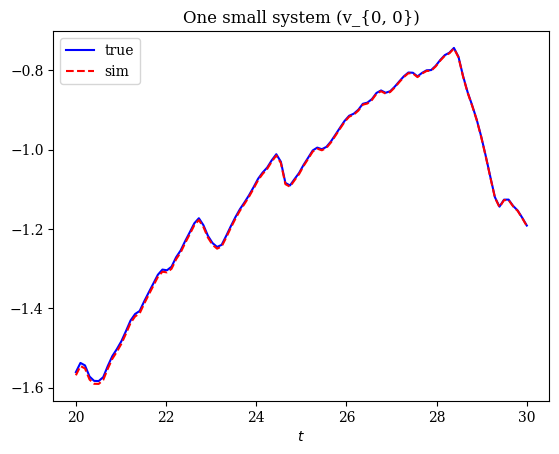

In [ ]:
fig, ax = plt.subplots(1, 1)

k = 40
ax.plot(tls[s], u[k, s], label="true", color="blue")
ax.plot(tls[s], v[k, s], label="sim", color="red", linestyle="--")

ax.set_title(f"One small system (v_{{{(k - I) // J}, {(k - I) % J}}})")
ax.set_xlabel("$t$")

ax.legend()
plt.show()

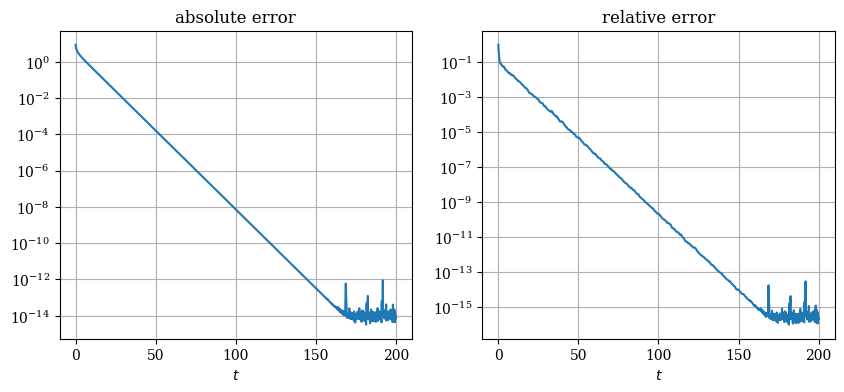

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = axs[0]
ax.semilogy(tls, err)
ax.set_xlabel("$t$")
ax.set_title("absolute error")
ax.grid()

ax = axs[1]
ax.semilogy(tls, rel_err)
ax.set_xlabel("$t$")
ax.set_title("relative error")
ax.grid()

plt.show()

# Use just one call to `solve_ivp`

In [ ]:
I = 40
J = 5
size = I * (J + 1)

# Initial Conditions
rng = np.random.default_rng(42)
u0 = rng.uniform(size=size)
v0 = np.zeros(size)
w10 = np.zeros(size)
w20 = np.zeros(size)

γ = np.array([1e-2, 0.5])
c = γ
d = np.array([0.2, 0.5, 1, 2, 5])  # Dissipation coefficients for the v_{k,j}
F = 8  # Forcing constant

state0 = np.concatenate([u0, v0, w10, w20])  # Initial state

T = 200  # Time
tn = 2000
mu = 50  # Nudging parameter

# Integrate the system
if include_sens:
    soln = solve_ivp(
        system,
        (0, T),
        state0,
        args=(I, J, γ, c, F, d, mu),
        dense_output=True,
    )
else:
    soln = solve_ivp(
        system_no_sens,
        (0, T),
        state0[: 2 * I * (J + 1)],
        args=(I, J, γ, c, F, d, mu),
        dense_output=True,
        rtol=1e-4,
    )

# Interpolate in time
tls = np.linspace(0, T, tn)
state = soln.sol(tls)
u = state[0:size]
v = state[size : 2 * size]

err = np.linalg.norm(u - v, axis=0)
rel_err = err / np.linalg.norm(u, axis=0)

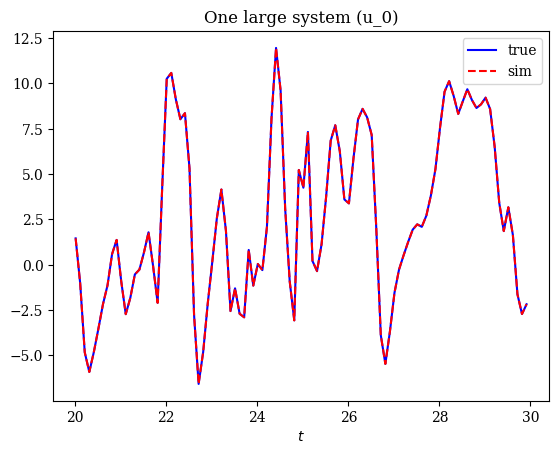

In [ ]:
s = np.s_[200:300]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], u[i, s], label="true", color="blue")
ax.plot(tls[s], v[i, s], label="sim", color="red", linestyle="--")

ax.set_title(f"One large system (u_{i})")
ax.set_xlabel("$t$")

ax.legend()
plt.show()

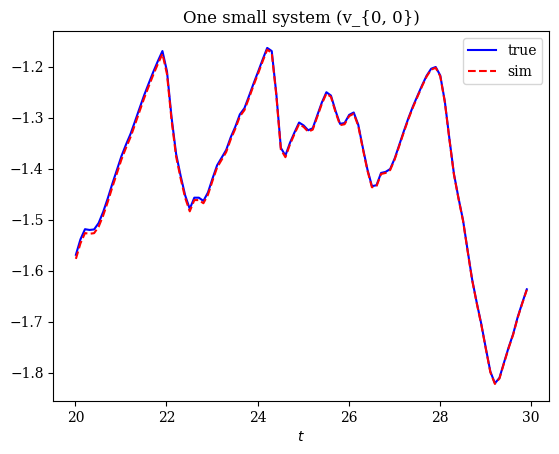

In [ ]:
fig, ax = plt.subplots(1, 1)

k = 40
ax.plot(tls[s], u[k, s], label="true", color="blue")
ax.plot(tls[s], v[k, s], label="sim", color="red", linestyle="--")

ax.set_title(f"One small system (v_{{{(k - I) // J}, {(k - I) % J}}})")
ax.set_xlabel("$t$")

ax.legend()
plt.show()

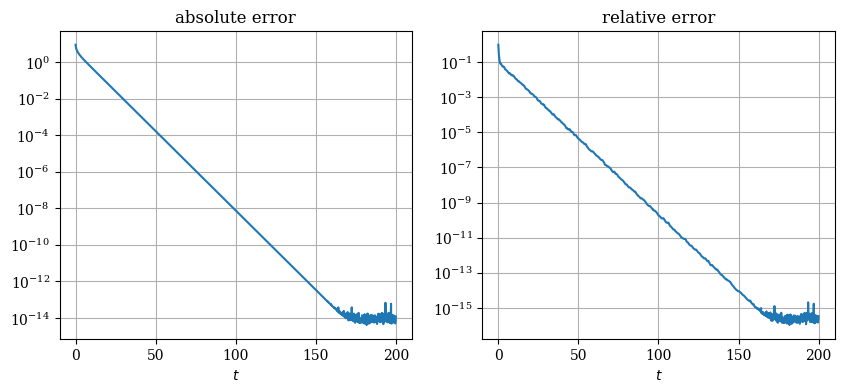

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = axs[0]
ax.semilogy(tls, err)
ax.set_xlabel("$t$")
ax.set_title("absolute error")
ax.grid()

ax = axs[1]
ax.semilogy(tls, rel_err)
ax.set_xlabel("$t$")
ax.set_title("relative error")
ax.grid()

plt.show()

# Run the true and nudged systems separately

In [ ]:
I = 40
J = 5
size = I * (J + 1)

# Initial Conditions
rng = np.random.default_rng(42)
u0 = rng.uniform(size=size)
v0 = np.zeros(size)

γ = np.array([1e-2, 0.5])
c = γ
d = np.array([0.2, 0.5, 1, 2, 5])  # Dissipation coefficients for the v_{k,j}
F = 8  # Forcing constant

T = 200  # Time
tn = 2000
mu = 50  # Nudging parameter

options = {
    "method": "RK45",
    "rtol": 1e-5,
    "first_step": 1e-3,
}

# Integrate the system
sol_true = solve_ivp(
    system_true,
    (0, T),
    u0,
    args=(I, J, γ, F, d),
    dense_output=True,
    **options,
)

sol_sim = solve_ivp(
    system_sim,
    (0, T),
    v0,
    args=(I, J, c, F, d, mu, sol_true.sol),
    dense_output=True,
    **options,
)

# Interpolate in time
tls = np.linspace(0, T, tn)
u = sol_true.sol(tls)
v = sol_sim.sol(tls)

err = np.linalg.norm(u - v, axis=0)
rel_err = err / np.linalg.norm(u, axis=0)

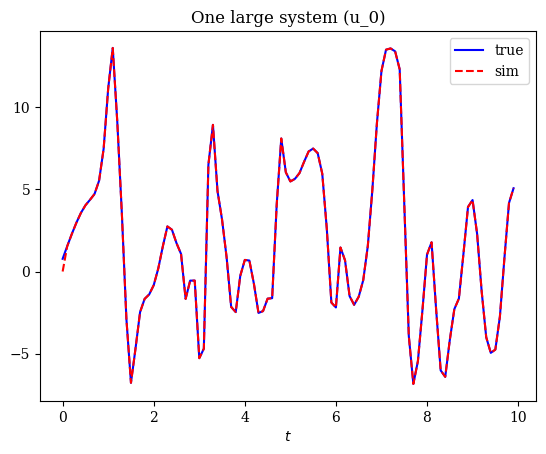

In [ ]:
s = np.s_[:100]

fig, ax = plt.subplots(1, 1)

i = 0
ax.plot(tls[s], u[i, s], label="true", color="blue")
ax.plot(tls[s], v[i, s], label="sim", color="red", linestyle="--")

ax.set_title(f"One large system (u_{i})")
ax.set_xlabel("$t$")

ax.legend()
plt.show()

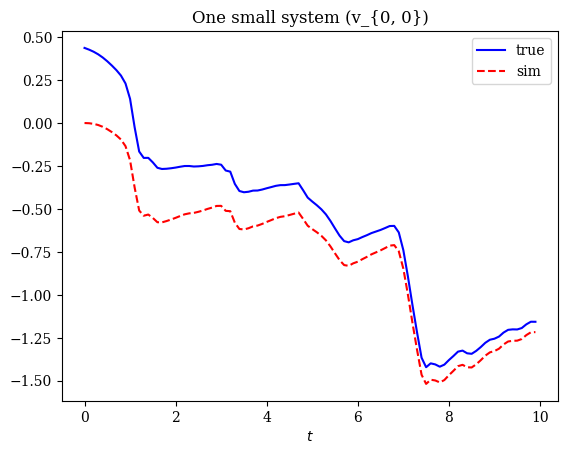

In [ ]:
fig, ax = plt.subplots(1, 1)

k = 40
ax.plot(tls[s], u[k, s], label="true", color="blue")
ax.plot(tls[s], v[k, s], label="sim", color="red", linestyle="--")

ax.set_title(f"One small system (v_{{{(k - I) // J}, {(k - I) % J}}})")
ax.set_xlabel("$t$")

ax.legend()
plt.show()

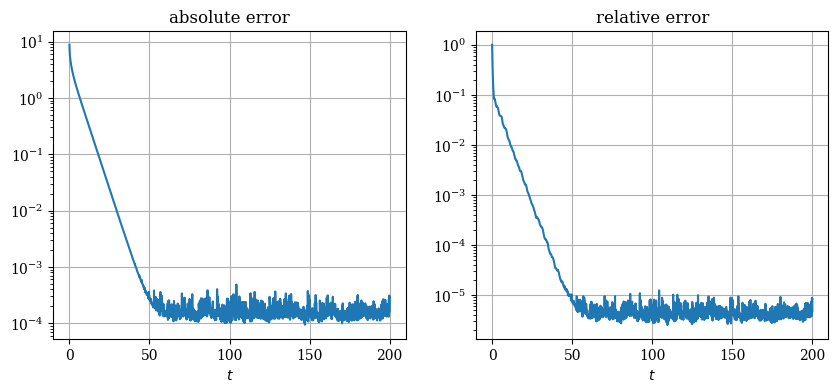

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = axs[0]
ax.semilogy(tls, err)
ax.set_xlabel("$t$")
ax.set_title("absolute error")
ax.grid()

ax = axs[1]
ax.semilogy(tls, rel_err)
ax.set_xlabel("$t$")
ax.set_title("relative error")
ax.grid()

plt.show()